## ML_CA2

Name: Bernardo Neres Silva   
Student Number: 2023484     
Lecturer: David McQuaid     
Submission Deadline Date: 31st May 2024    
Github Link : https://github.com/neresbernardo/Bernardo_Neres_ML_CA2   
 


### Neural Networks

In [21]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import matplotlib.pyplot as plt


In [20]:
# Load Data
data = pd.read_csv('BankRecords.csv')
print(data.head())

# Verify the columns
print(data.columns)


   ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0           1.6   Diploma                      0            No   
1           1.5   Diploma                      0            No   
2           1.0   Diploma                      0            No   
3           2.7    Degree                      0            No   
4           1.0    Degree                      0            No   

  Securities Account CD Account Online Banking CreditCard  
0                Yes         No             No         No  
1                Yes         No             

In [23]:
# Data Preprocessing
# Part to handle missing values if we have any
data = data.dropna()

# Ensure the column name is correct
column_name = "Income(Thousands's)"  

# Encode categorical variables
categorical_features = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']  # example categorical features
numerical_features = ["Age", "Experience(Years)", "Family", "Credit Score", "Mortgage(Thousands's)"]  # example numerical features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = data.drop(column_name, axis=1)
y = data[column_name]

# Apply preprocessing to features
X_preprocessed = preprocessor.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Output shapes and some samples to verify if everthing its running properly
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("First 5 rows of X_train:\n", X_train[:5])
print("First 5 rows of y_train:\n", y_train[:5].values)


Shape of X_train: (4000, 18)
Shape of X_test: (1000, 18)
First 5 rows of X_train:
 [[-1.1637042  -1.14282905 -1.21685513  1.06557702 -0.55552393  0.
   1.          0.          1.          0.          0.          1.
   1.          0.          1.          0.          1.          0.        ]
 [-0.55299157 -0.61957964  0.52599094  0.09275391 -0.55552393  0.
   1.          0.          1.          0.          0.          1.
   1.          0.          0.          1.          1.          0.        ]
 [-1.25094887 -1.14282905 -1.21685513  2.32452458 -0.55552393  0.
   1.          0.          1.          0.          1.          0.
   1.          0.          0.          1.          1.          0.        ]
 [ 0.40669972  0.4269192  -1.21685513 -0.88006919 -0.55552393  0.
   0.          1.          1.          0.          1.          0.
   1.          0.          0.          1.          1.          0.        ]
 [ 1.45363567  1.47341804  0.52599094 -0.99451897 -0.55552393  0.
   1.          0.      

In [16]:
# Neural Network Model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 502us/step - loss: 5312.3989 - mae: 57.4651 - val_loss: 936.6428 - val_mae: 24.9083
Epoch 2/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - loss: 1140.4950 - mae: 27.4310 - val_loss: 838.9926 - val_mae: 23.4754
Epoch 3/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 953.6163 - mae: 24.6191 - val_loss: 837.4077 - val_mae: 23.6535
Epoch 4/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 965.2383 - mae: 24.8540 - val_loss: 817.1449 - val_mae: 23.4586
Epoch 5/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 885.7686 - mae: 23.7573 - val_loss: 797.3254 - val_mae: 22.9099
Epoch 6/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 874.5487 - mae: 23.4904 - val_loss: 787.4495 - val_mae: 22.7928
Epoch 7/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - loss: 882.4959 - mae: 23.4930 - val_loss: 766.9374 - val_mae: 22.1489
Epoch 8/100
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - loss: 838.1379 - mae: 22.6513 - val_loss: 763.4089 -

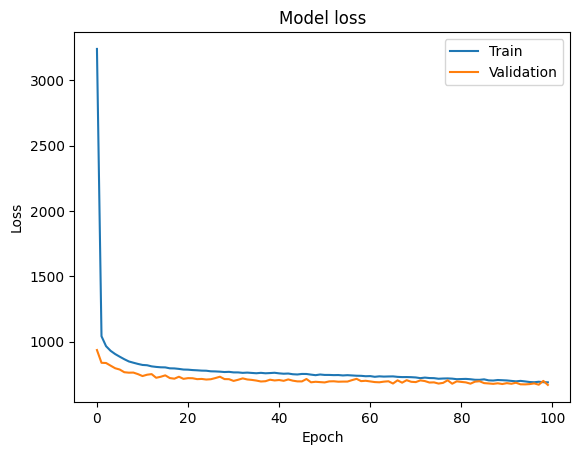

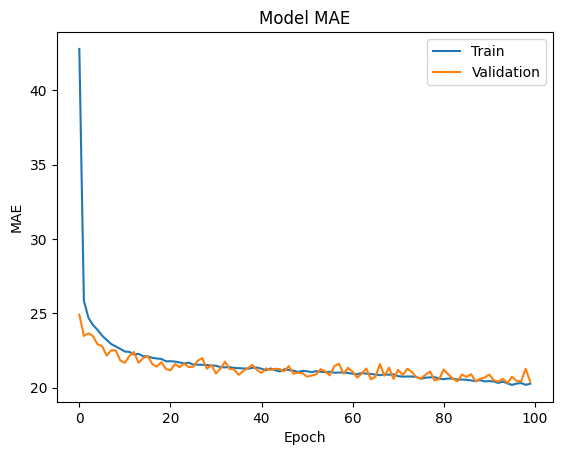

In [17]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


### References